In [1]:
import os
import pickle
from tqdm.notebook import tqdm
import sentencepiece as spm

In [2]:
# we make data from scratch (ie WebQSP dump)
source_folder = '/scratche/home/apoorv/freebase/ComplexWebQuestions'
! ls {source_folder}

ComplexWebQuestions_dev.json   ComplexWebQuestions_train.json
ComplexWebQuestions_test.json


In [3]:
import json
fname = os.path.join(source_folder, 'ComplexWebQuestions_train.json')
train = json.load(open(fname))
fname = os.path.join(source_folder, 'ComplexWebQuestions_test.json')
test = json.load(open(fname))
fname = os.path.join(source_folder, 'ComplexWebQuestions_dev.json')
dev = json.load(open(fname))

In [13]:
fname = 'data/cwq_full/ent_map_cwq_full.pickle'
entity_map = pickle.load(open(fname, 'rb'))

In [14]:
print(len(entity_map))
print(entity_map['m.0ftf0f'])

6790959
Florida Gators football


In [5]:
train[2]

{'ID': 'WebQTrn-2360_a40a0d50b9a1006e2d254705d46345ea',
 'answers': [{'aliases': ['University of Florida Gators Mens Football',
    'Gators Mens Football',
    'Florida Gators Football',
    "Gators Men's Football",
    'University of Florida Mens Football',
    'University of Florida Football',
    "Florida Men's Football",
    'UF Gators Mens Football',
    "University of Florida Gators Men's Football",
    'UF Mens Football',
    "University of Florida Men's Football",
    'Gators Football',
    'UF Gators Football',
    'University of Florida Gators Football',
    "UF Gators Men's Football",
    'UF Football',
    "Florida Gators Men's Football",
    'Florida Football',
    'Florida Mens Football',
    'Florida Gators Mens Football',
    "UF Men's Football"],
   'answer': 'Florida Gators football',
   'answer_id': 'm.0ftf0f'}],
 'composition_answer': '',
 'compositionality_type': 'conjunction',
 'created': '2018-02-12T23:49:23',
 'machine_question': 'what football teams did emmitt 

In [32]:
# from unidecode import unidecode
import unicodedata

def normalize_string(s):
    s = unicodedata.normalize('NFKC', s)
    s = s.replace('|', '.')
    s = s.replace('\t', ' ')
    return s

def makeQuestion(question):
    global entity_map
    q_text = question['question']
    q_text = normalize_string(q_text)
    answers = []
    for a in question['answers']:
        ans_id = a['answer_id']
        if ans_id not in entity_map:
            ans = a['answer']
            if ans == '' or ans == None:
                ans = ans_id
            print(ans, q_text)
        else:
            ans = entity_map[ans_id]
        if ans == None or ans == '':
            continue
        ans = normalize_string(ans)
        answers.append(ans)
    answers_string = '|'.join(answers)
    final_string = q_text + '\t' + answers_string
    return final_string

In [33]:
from tqdm.notebook import tqdm
train_lines = []
for q in tqdm(train):
    out = makeQuestion(q)
    train_lines.append(out)

Google Maps Engine What organizational divisions are under the leadership of Sergey Brin?
Google Earth Enterprise What organizational divisions are under the leadership of Sergey Brin?
Google Maps API for Business What organizational divisions are under the leadership of Sergey Brin?
Jump (Club Cheval Rap Remix) What was the new album called in 2012 of the artist who had a concert tour named Last Girl on Earth?
g.121_5zdm What was the new album called in 2012 of the artist who had a concert tour named Last Girl on Earth?
g.121n8wcw What was the new album called in 2012 of the artist who had a concert tour named Last Girl on Earth?
g.121xjjw_ What was the new album called in 2012 of the artist who had a concert tour named Last Girl on Earth?
Google Maps Engine What are all the things that Google Cloud Platform has?
Google Earth Enterprise What are all the things that Google Cloud Platform has?
Google Maps API for Business What are all the things that Google Cloud Platform has?
g.122dshg

In [29]:
for q in tqdm(train):
    if q['question'] == 'What was the childhood nickname of the politician who held the Administrator of the Government?':
        break
q

{'ID': 'WebQTest-616_2f712b63778fb8f9fa05a5206b873565',
 'answers': [{'aliases': [], 'answer': None, 'answer_id': 'Elizabeth II'},
  {'aliases': [], 'answer': None, 'answer_id': 'Lilibet'}],
 'composition_answer': 'elizabeth ii',
 'compositionality_type': 'composition',
 'created': '2017-10-26T08:15:40',
 'machine_question': 'what was queen the politician that held the government position Administrator of the Government childhood nickname',
 'question': 'What was the childhood nickname of the politician who held the Administrator of the Government?',
 'sparql': "PREFIX ns: <http://rdf.freebase.com/ns/>\nSELECT DISTINCT ?x\nWHERE {\nFILTER (?x != ?c)\nFILTER (!isLiteral(?x) OR lang(?x) = '' OR langMatches(lang(?x), 'en'))\n?c ns:government.political_appointer.appointees ?k .\n?k ns:government.government_position_held.basic_title ns:m.01k6mf . \n?c ns:base.schemastaging.context_name.nickname ?x .\n}\n",
 'webqsp_ID': 'WebQTest-616',
 'webqsp_question': 'what was queen elizabeth ii childh

In [34]:
dev_lines = []
for q in tqdm(dev):
    out = makeQuestion(q)
    dev_lines.append(out)

g.121xqqc4 What is there to do in the city that hosted the 2002 Winter Olympics?
g.121xqqc4 What are attractions in the location where "The Life of Nephi" takes place?
g.121xqqc4 What are things to do in the location of the movie "A Hobo's Christmas"?



In [35]:
test_lines = []
for id, q in enumerate(test):
    q['answers'] = []
    out = makeQuestion(q)
    test_lines.append(out)

In [36]:
test_lines[:10]

['Lou Seal is the mascot for the team that last won the World Series when?\t',
 'Where did the "Country Nation World Tour" concert artist go to college?\t',
 'What is the predominant religion where the leader is Ovadia Yosef?\t',
 'What country bordering France contains an airport that serves Nijmegen?\t',
 'The national anthem Afghan National Anthem is from the country which practices what religions?\t',
 'Which nation has the Alta Verapaz Department and is in Central America?\t',
 'Which man is the leader of the country that uses Libya, Libya, Libya as its national anthem?\t',
 'What educational institution has a football sports team named Northern Colorado Bears is in Greeley, Colorado?\t',
 'What language is spoken in the location that appointed Michelle Bachelet to a governmental position speak?\t',
 'What type of government is used in the country with Northern District?\t']

In [37]:
train_lines[:10]

["What state is home to the university that is represented in sports by George Washington Colonials men's basketball?\tWashington, D.C.",
 'What year did the team with Baltimore Fight Song win the Superbowl?\tSuper Bowl XLVII|Super Bowl XXXV',
 'Which school with the fight song "The Orange and Blue" did Emmitt Smith play for?\tFlorida Gators football',
 "What movie with film character named Mr. Woodson did Tupac star in?\tGridlock'd",
 'What country sharing borders with Spain does the SetÃobal District belong to?\tPortugal',
 'Who was the 1996 coach of the team owned by Jerry Jones?\tBarry Switzer',
 'Who dated the performer who headlined the concert tour called Demi World Tour?\tNicholas Braun|Joe Jonas|Cody Linley',
 'Which team owned by Malcolm Glazer has Tim Howard playing for it?\tManchester United F.C.',
 'What movie starring Zac Efron that has a character named Owen Lars?\tRobot Chicken: Star Wars Episode III',
 'What business titles was the most famous alumni of Detroit Busines

In [38]:
dev_lines[0]

'Who was the president in 1980 of the country that has Azad Kashmir?\tMuhammad Zia-ul-Haq'

In [51]:
test_lines[3]

'what country bordering france contains an airport that serves nijmegen?\t'

In [39]:
def writeLines(lines, fname):
    f = open(fname, 'w')
    for line in lines:
        f.write(line + '\n')
    f.close()

In [40]:
fname = 'data/cwq_full/qa_train_1hop.txt'
writeLines(train_lines, fname)
fname = 'data/cwq_full/qa_test_1hop.txt'
writeLines(dev_lines, fname)

In [41]:
fname = 'data/cwq_full/qa_test_actual_1hop.txt'
writeLines(test_lines, fname)

In [22]:
def getUniqueMap(init_map):
    out_map = {}
    values = set()
    for key, value in init_map.items():
        if value not in values:
            out_map[key] = value
            values.add(value)
        else:
            id_to_append = 0
            new_value = value + ' ' + str(id_to_append)
            while(new_value in values):
                id_to_append += 1
                new_value = value + ' ' + str(id_to_append)
            out_map[key] = new_value
            values.add(new_value)
    assert len(init_map) == len(set(out_map.values()))
    return out_map

def mapTriple(triple, ent_map, rel_map):
    t = triple
    new_triple = [ent_map[t[0]], rel_map[t[1]], ent_map[t[2]]]
    return new_triple

In [23]:
# uniq_ent_map = getUniqueMap(entity_map)
uniq_ent_map = entity_map

In [24]:
mapTriple(data['train'][0], uniq_ent_map, relation_map)

['Arthur Kingscote', 'place of death', 'Fulham']

In [15]:
out_folder = '/scratche/home/apoorv/transformer-kgc/data/MetaQA'
splits = ['train', 'test', 'valid']
for split in splits:
    fname = os.path.join(out_folder, split + '.txt')
    f = open(fname, 'w')
    triples = data[split]
    for t in triples:
        t = mapTriple(t, uniq_ent_map, relation_map)
        head, relation, tail = t
        input = 'predict tail: {0} | {1} |'.format(head, relation)
        output = '{}'.format(tail)
        f.write(input + '\t' + output + '\n')
        
        input = 'predict head: {0} | {1} |'.format(tail, relation)
        output = '{}'.format(head)
        f.write(input + '\t' + output + '\n')
    f.close()

In [16]:
# create entity_strings.txt which is needed in evaluation code
strings_file_name = 'entity_strings.txt'
f = open(os.path.join(out_folder, strings_file_name), 'w')
ents_uniq = set(uniq_ent_map.values())
for e in ents_uniq:
    f.write(e + '\n')
f.close()

In [17]:
def readQALines(fname):
    f = open(fname)
    questions = []
    for line in f:
        line = line.strip().split('\t')
        q = line[0]
        q = q.replace('[', '')
        q = q.replace(']', '')
        q = normalizeEntity(q)
        questions.append(q)
    return questions
        
def writeLines(lines, fname):
    f = open(fname, 'w')
    for line in lines:
        f.write(line + '\n')


In [18]:
fname = 'data/MetaQA/full_qa.txt'
questions = readQALines(fname)

In [19]:
fname = 'data/MetaQA/full_q_only.txt'
writeLines(questions, fname)

In [ ]:
vocab_size = 20000
sp = spm.SentencePieceTrainer.train(input='data/MetaQA/full_for_sp_train.txt', 
                                    model_prefix='metaqa_with_pad', vocab_size=vocab_size, 
                                    pad_id=3,
#                                     character_coverage=1.0,
#                                user_defined_symbols=['<pad>'],
#                                     normalization_rule_name='identity',
                              )

In [21]:
sp = spm.SentencePieceProcessor(model_file='data/sentencepiece/metaqa_with_pad.model')

In [22]:
sp['|']

5

In [39]:
sp.encode('about')

[4, 8811, 37]

In [92]:
lengths = []
for e in ents_uniq:
    encoded = sp.encode(e)
    lengths.append(len(encoded))

Text(0.5, 0, 'Tokenized lengths')

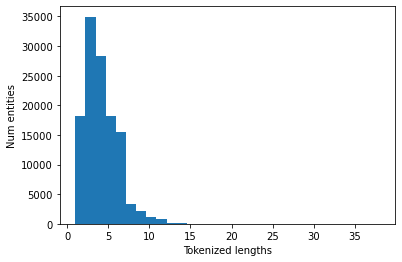

In [93]:
import matplotlib.pyplot as plt 

import numpy as np 

%matplotlib inline

# x = np.random.normal(size = 1000) 
x = lengths
plt.hist(x, bins=30) 

plt.ylabel('Num entities');
plt.xlabel('Tokenized lengths')

In [94]:
sp.encode('plays for')

[19, 13, 18]

In [35]:
from unidecode import unidecode
entities_ud = []
entities_ud_set = set()
for e in entities:
    ud_e = unidecode(e)
    entities_ud.append(ud_e)
    if ud_e in entities_ud_set:
        print(e, ud_e)
    else:
        entities_ud_set.add(ud_e)

University_of_Illinois_at_Urbana-Champaign University_of_Illinois_at_Urbana-Champaign
Hoang_Anh_Gia_Lai_F.C. Hoang_Anh_Gia_Lai_F.C.
Zurich Zurich
Toshirō_Mifune Toshiro_Mifune
Karl_Weierstrass Karl_Weierstrass
László_Bálint Laszlo_Balint
Sergio_Araujo Sergio_Araujo
Carlos_Tevez Carlos_Tevez
Polish-Lithuanian_Commonwealth Polish-Lithuanian_Commonwealth
Przemysl_II Przemysl_II
Christian_Groß Christian_Gross
Izmir Izmir
Münster Munster
Dalibor_Stevanovič Dalibor_Stevanovic
Jürgen_Gjasula Jurgen_Gjasula
Sócrates Socrates
Zlatko_Dedič Zlatko_Dedic
Antônio_Bezerra_Brandão Antonio_Bezerra_Brandao
Aleksander_Kwasniewski Aleksander_Kwasniewski
Sani_Bečirović Sani_Becirovic
Izmit Izmit
Ryukyu_Islands Ryukyu_Islands
Stanisław_Ulam Stanislaw_Ulam
Pantheon-Assas_University Pantheon-Assas_University
Quang_Binh_Province Quang_Binh_Province
Mures_County Mures_County
Braila Braila
San_Sebastian San_Sebastian
Ploiesti Ploiesti
Beja Beja
Zé_Antônio Ze_Antonio
San_Miguel_de_Tucumán San_Miguel_de_Tucuman
F

In [28]:
len(entities), len(set(entities))

(123182, 123182)

In [33]:
len(entities_ud), len(set(entities_ud))

(123182, 123145)